### Histograms - 1 : Find, Plot, Analyze !!!

Find histograms, using both OpenCV and Numpy functions


Plot histograms, using OpenCV and Matplotlib functions


You will see these functions : cv.calcHist(), np.histogram() etc.

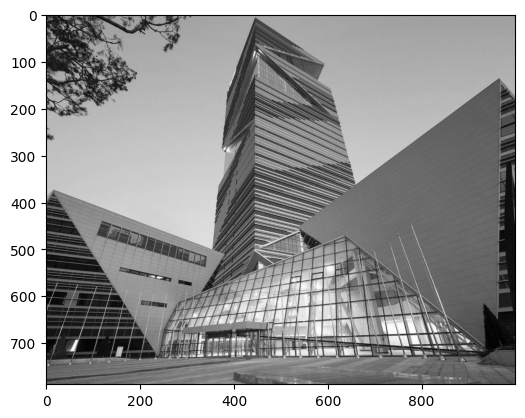

C:\Users\roman\AppData\Local\Temp\ipykernel_37500\3810821987.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(),256,[0,256]); plt.show()


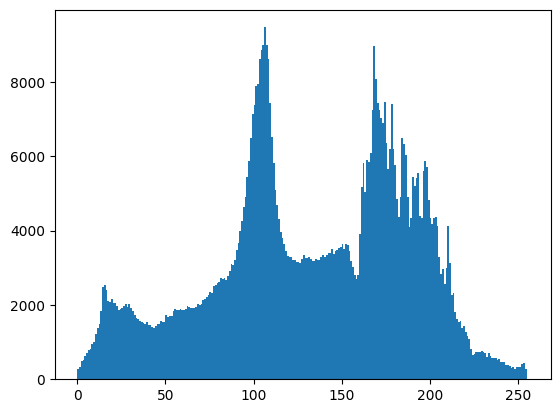

In [8]:
import numpy as np
import sys
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('house.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

plt.imshow(img, cmap = 'gray')
plt.show()

plt.hist(img.ravel(),256,[0,256]); plt.show()



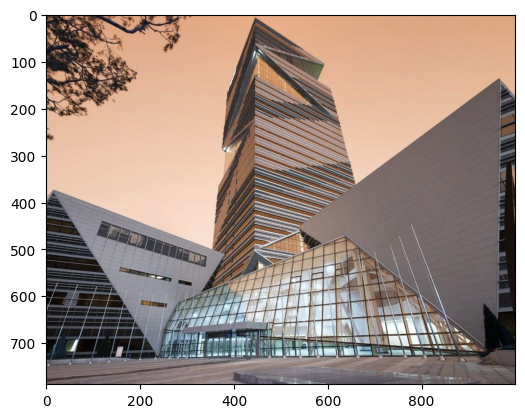

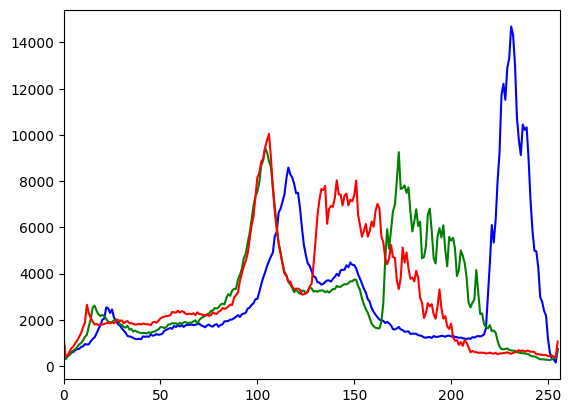

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('house.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')

plt.imshow(img)
plt.show()

for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

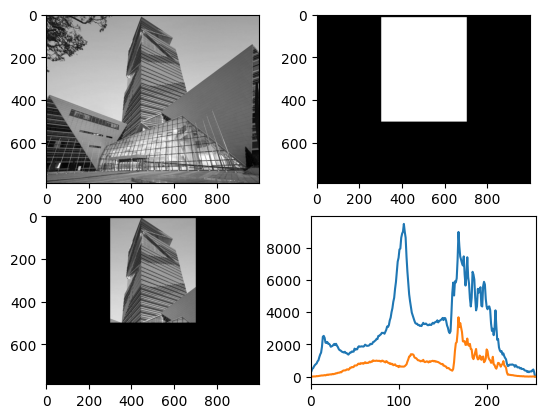

In [21]:
img = cv.imread('house.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[10:500, 300:700] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

### Histograms - 2: Histogram Equalization

Эквализация гистограммы - метод улучшения контраста изображения

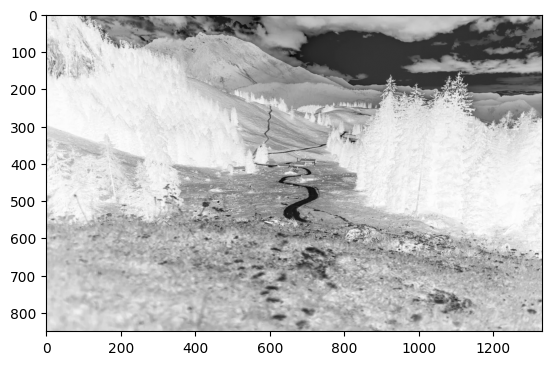

C:\Users\roman\AppData\Local\Temp\ipykernel_37500\2355214722.py:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(),256,[0,256], color = 'r')


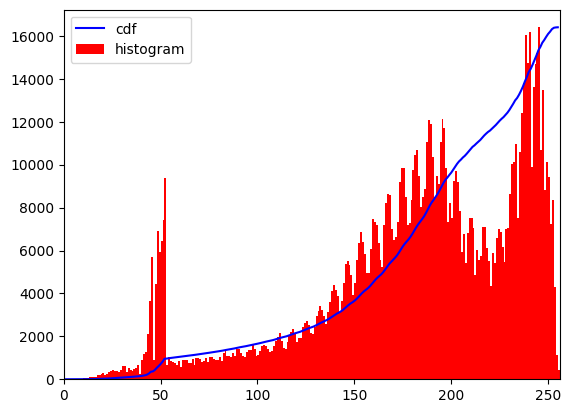

In [37]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('forest.png', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
# Создает гистограмму изображения: подсчитывает, сколько пикселей имеет каждое значение яркости
hist,bins = np.histogram(img.flatten(),256,[0,256])
# CDF (Cumulative Distribution Function) - кумулятивная функция распределения
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.imshow(img, cmap = 'gray')
plt.show()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

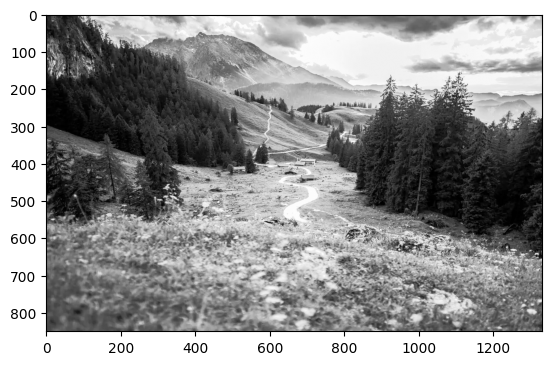

C:\Users\roman\AppData\Local\Temp\ipykernel_37500\1316016011.py:22: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax1.hist(img2.flatten(), 256, [0,256], color=color, alpha=0.7)


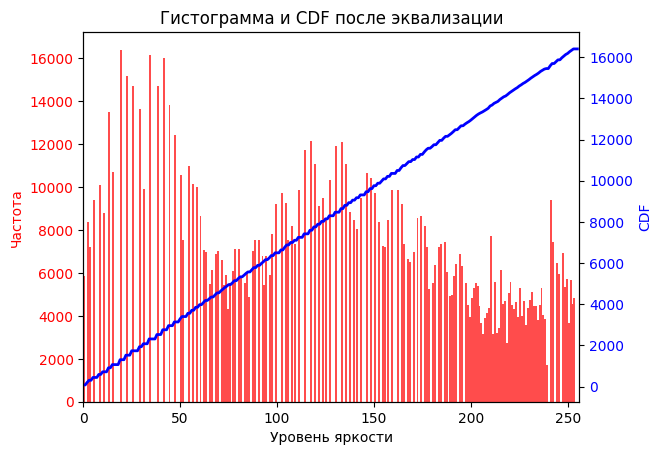

In [54]:
# Эквализация гистограммы
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf_final[img]

# Анализ после эквализации
hist2, bins2 = np.histogram(img2.flatten(), 256, [0,256])
cdf2 = hist2.cumsum()

# Визуализация результата эквализации
plt.imshow(img2, cmap='gray')
plt.show()

# Гистограмма и CDF после эквализации на одном графике с двумя осями Y
fig, ax1 = plt.subplots()

# Гистограмма на первой оси (красная)
color = 'red'
ax1.set_xlabel('Уровень яркости')
ax1.set_ylabel('Частота', color=color)
ax1.hist(img2.flatten(), 256, [0,256], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# CDF на второй оси (синяя)
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('CDF', color=color)
cdf2_normalized = cdf2 * float(hist2.max()) / cdf2.max()  # Нормализация для отображения
ax2.plot(cdf2_normalized, color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.xlim([0,256])
plt.title('Гистограмма и CDF после эквализации')
plt.show()

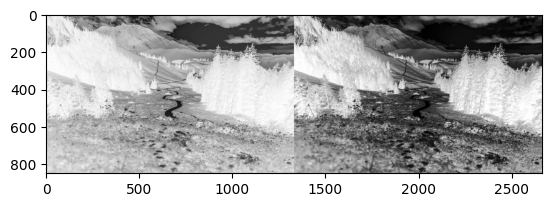

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('forest.png', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"

equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

plt.imshow(res, cmap='gray')
plt.show()


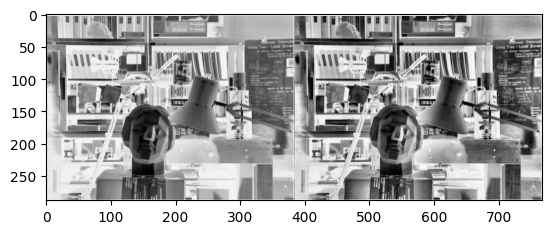

In [16]:
import numpy as np
import cv2 as cv
img = cv.imread('sculpture.png', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

res = np.hstack((img,cl1)) #stacking images side-by-side
plt.imshow(res, cmap='gray')
plt.show()

### Histograms - 3 : 2D Histograms

HSV (Hue - тон, Saturation - насыщенность, Value - значение) лучше подходит для анализа цвета

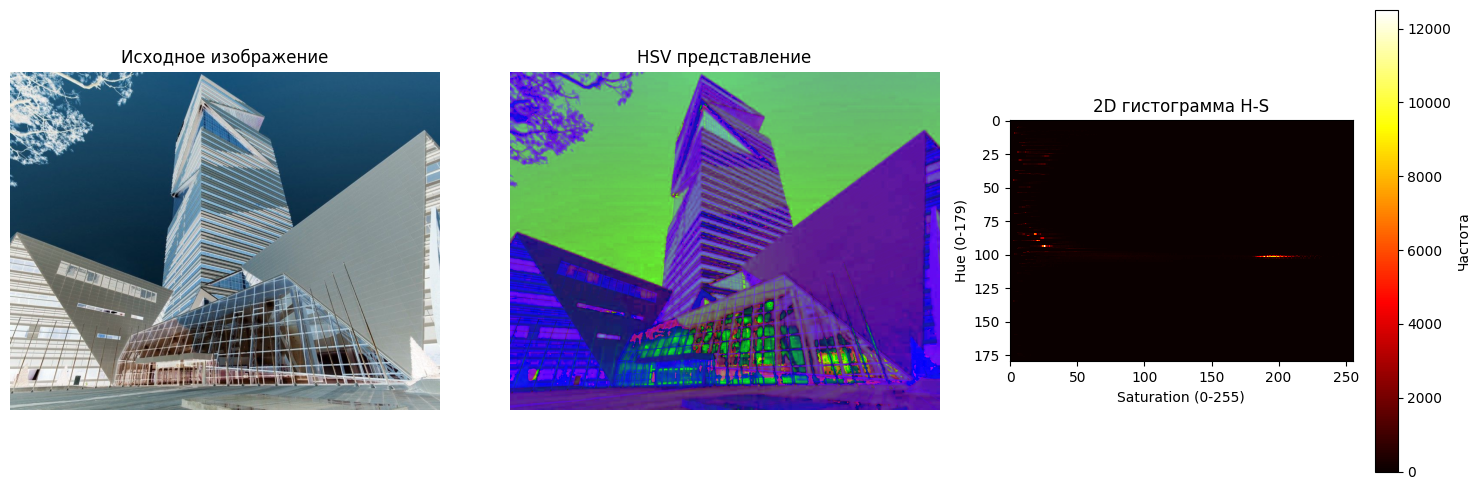

In [38]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('house.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"

# Преобразование в HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Создание 2D гистограммы по каналам H и S
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Визуализация
plt.figure(figsize=(15, 5))

# Исходное изображение
plt.subplot(1, 3, 1)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Исходное изображение')
plt.axis('off')

# HSV представление
plt.subplot(1, 3, 2)
plt.imshow(hsv)
plt.title('HSV представление')
plt.axis('off')

# 2D гистограмма H-S
plt.subplot(1, 3, 3)
plt.imshow(hist, interpolation='nearest', cmap='hot')
plt.title('2D гистограмма H-S')
plt.xlabel('Saturation (0-255)')
plt.ylabel('Hue (0-179)')
plt.colorbar(label='Частота')

plt.tight_layout()
plt.show()